# Exercise 2.2
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. 
* See http://en.wikipedia.org/wiki/Sawtooth_wave.
* Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.
* Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [ ]:
# No es necesario crear la clase SawtoothSignal. Ya está creada en thinkdsp.py

#Cargamos el script de thinkDSP

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py


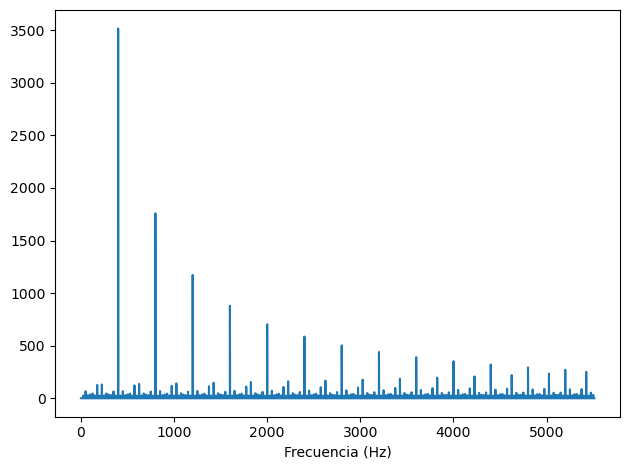

In [82]:
# Creamos una señal diente de sierra a 400 Hz

from thinkdsp import SawtoothSignal
from thinkdsp import decorate

framerate = 11025
duration = 1

sawtooth400 = SawtoothSignal(freq = 400)
wave_sawtooth400 = sawtooth400.make_wave(framerate = framerate)
spectrum_sawtooth400 = wave_sawtooth400.make_spectrum()
spectrum_sawtooth400.plot(high = 10000)
decorate(xlabel = 'Frecuencia (Hz)')

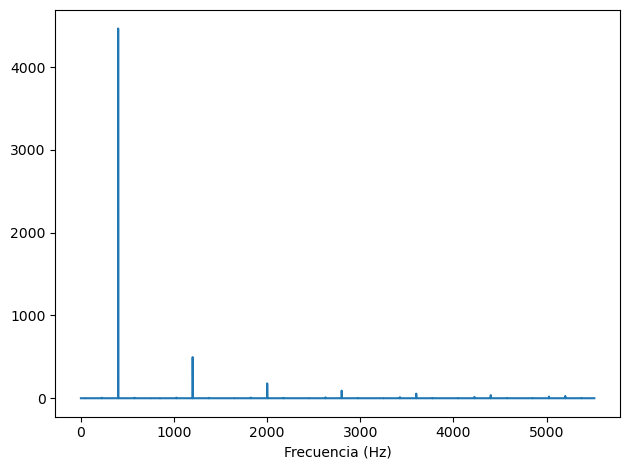

In [21]:
# Hacemos lo mismo para la señal triangular

from thinkdsp import TriangleSignal

triangle400 = TriangleSignal(freq = 400)
wave_triangle400 = triangle400.make_wave(duration = duration, framerate = framerate)
spectrum_triangle400 = wave_triangle400.make_spectrum()
spectrum_triangle400.plot(high = 10000)
decorate(xlabel = 'Frecuencia (Hz)')

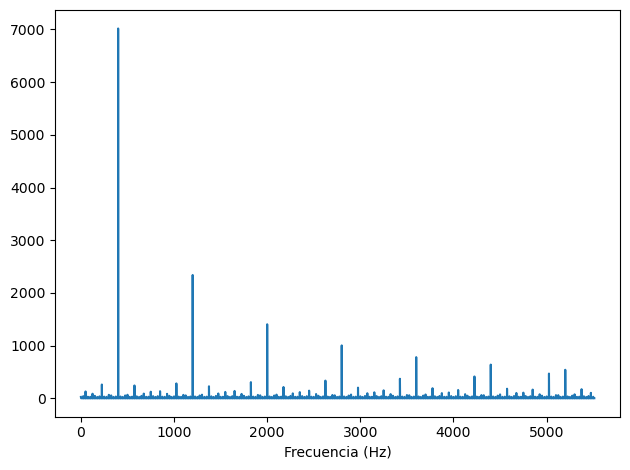

In [22]:
# Hacemos lo mismo para la señal cuadrada

from thinkdsp import SquareSignal

squared400 = SquareSignal(freq = 400)
wave_squared400 = squared400.make_wave(duration = duration, framerate = framerate)
spectrum_squared400 = wave_squared400.make_spectrum()
spectrum_squared400.plot(high = 10000)
decorate(xlabel = 'Frecuencia (Hz)')

In [ ]:
# Exportar resultado de la descomposición espectral de la señal diente de sierra
import pandas as pd
import numpy as np

df = pd.DataFrame({'Frecuencia_Hz':spectrum_sawtooth400.fs, 'Magnitud':np.absolute(spectrum_sawtooth400.hs)})
df.to_csv('spectrum_sawtooth400',index = False)

In [25]:
# Exportar resultado de la descomposición espectral de la señal triangular
import pandas as pd
import numpy as np

df = pd.DataFrame({'Frecuencia_Hz':spectrum_triangle400.fs, 'Magnitud':np.absolute(spectrum_triangle400.hs)})
df.to_csv('spectrum_triangle400',index = False)

In [26]:
# Exportar resultado de la descomposición espectral de la señal cuadrada
import pandas as pd
import numpy as np

df = pd.DataFrame({'Frecuencia_Hz':spectrum_squared400.fs, 'Magnitud':np.absolute(spectrum_squared400.hs)})
df.to_csv('spectrum_squared400',index = False)

# Comparaciones entre los espectros
* **Señal diente de sierra:** 
    * Presenta el mayor número de armónicos en el mismo rango de frecuencias [0 - 5000] de entre las tres señales.
    * La amplitud de sus armónicos decae más lento a medida que se incrementa la frecuencia.
    * Presenta algunos pequeños picos que corresponden a los armónicos con frecuencia mayor a 5512 (frecuencia de Nyquist)
    * Analizando los datos de la descomposición espectral, se observa que los armónicos se encuentran separados cada 400 Hz y están presentes todos los armonicos, tanto pares como impares. La magnitud decae a una escala 1/n con respecto al primer armónico.

* **Señal triangular:** 
    * Es la que presenta el menor número de armónicos en el mismo rango de frecuencias [0 - 5000] de entre las tres señales.
    * La amplitud de sus armónicos decae más rápido a medida que se incrementa la frecuencia.
    * Los pequeños picos que corresponden a los armónicos con frecuencia mayor a 5512 (frecuencia de Nyquist) son poco visible debido a que a esas frecuencias, su magnitud es casi nula. Sin embargo, pueden observarse cuando se analizan los datos.
    * Analizando los datos de la descomposición espectral, también se observa que los armónicos se encuentran separados en armónicos impares partiendo desde la frecuencia fundamental (400 Hz). La magnitud decae a una escala 1/n^2 con respecto al primer armónico.

* **Señal cuadrada:** 
    * De entre las tres señales, presenta el segundo lugar en número de armónicos en el mismo rango de frecuencias [0 - 5000] .
    * Esta en seguno lugar en la velocidad de descaimiento de la amplitud de sus armónicos a medida que se incrementa la frecuencia.
    * Los picos corresponden a los armónicos con frecuencia mayor a 5512 (frecuencia de Nyquist). Aún tienen una magnitud importante, las cuales se comparan a los armónicos con frecuencia menor a la frecuencia de muestreo.
    * Analizando los datos de la descomposición espectral, también se observa que los armónicos se encuentran separados en armónicos impares partiendo desde la frecuencia fundamental (400 Hz). La magnitud decae a una escala 1/n con respecto al primer armónico.

# Exercise 2.3
Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the
aliased harmonics?

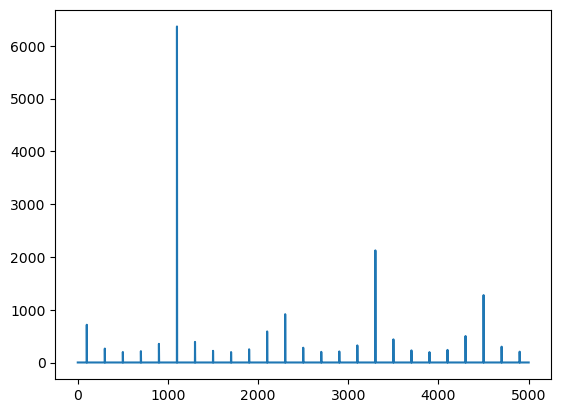

In [27]:
# Señal cuadrada de acuerdo a lo soicitado en el ejercicio

squared1100 = SquareSignal(1100)
wave_squared1100 = squared1100.make_wave(framerate=10000)
spectrum_squared1100 = wave_squared1100.make_spectrum()
spectrum_squared1100.plot()

In [28]:
# Audio de la señal

wave_squared1100.make_audio()

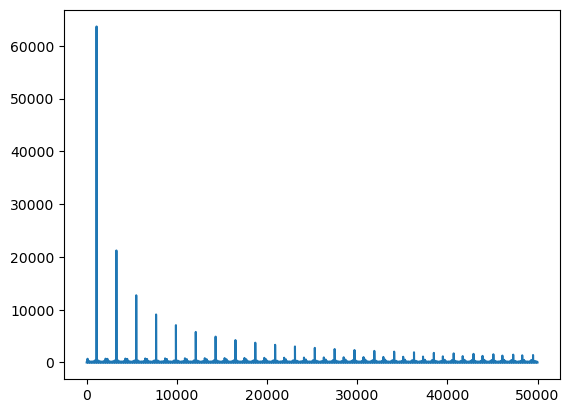

In [36]:
# Señal cuadrada sin aliasing para comparación

wave_squared1100_2 = squared1100.make_wave(framerate=100000)
spectrum_squared1100_2 = wave_squared1100_2.make_spectrum()
spectrum_squared1100_2.plot()

In [35]:
wave_squared1100_2.make_audio()

Al principio no sabía qué se suponía debía percibir en el audio. Solo escuché un sonido chirriante y agudo que no correspondía a lo que se suele escuchar en una señal cuadrada. Para responder a esa pregunta, creé una señal cuadrada sin aliasing y poder comparar el timbre del sonido en ambos audios. Para este audio, creé un objeto wave de una señal periódica de la misma frecuencia pero con una frecuencia de muestreo de 100000; diez veces más. Con ello, el audio se escucha más acorde a lo que se oye en una señal cuadrada; similar a los viejos videojuegos de NES. La señal con aliasing tiene un componente de alta frecuencia más presente en el timbre del sonido, lo que lo hace sonar más agudo que la señal sin aliasing.

# Exercise 2.4
If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean? \
Try this experiment:
1. Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2. Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
3. Set spectrum.hs[0] = 100. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?


In [ ]:
# Tomemos el espectro de la señal cuadrada de 1100 Hz sin aliasing

# Imprimimos los diez primeros elementos del array de frecuencias

for fs in spectrum_squared1100_2.fs[0:10]:
    print(fs)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [ ]:
# Imprimimos los diez primeros elementos del array de magnitudes.
# En efecto, las primeras frecuencias tienen una magnitud mayor a cero.

for hs in spectrum_squared1100_2.hs[0:10]:
    print(np.absolute(hs))

2.0
1.9999999999999996
2.0
1.9999999999999998
2.0
2.0
2.0
2.0
2.0
2.0000000000000004


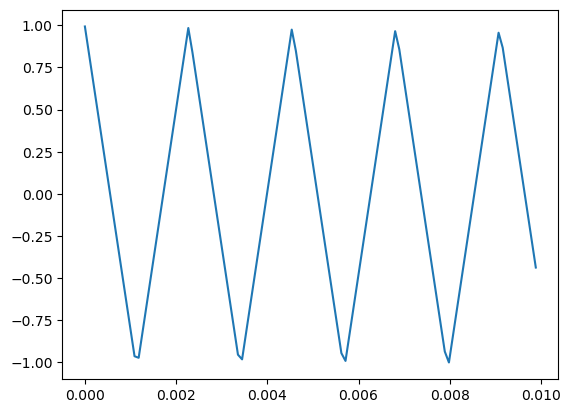

In [41]:
# Señal triangular de 440 Hz y duración de 0.01

triangle440 = TriangleSignal(440)
wave_triangle440 = triangle440.make_wave(duration=0.01)
wave_triangle440.plot()

In [42]:
# Valor de la magnitud y fase del valor 0 del array hs

spectrum_triangle440 = wave_triangle440.make_spectrum()
print(spectrum_triangle440.hs[0])

(1.0436096431476471e-14+0j)


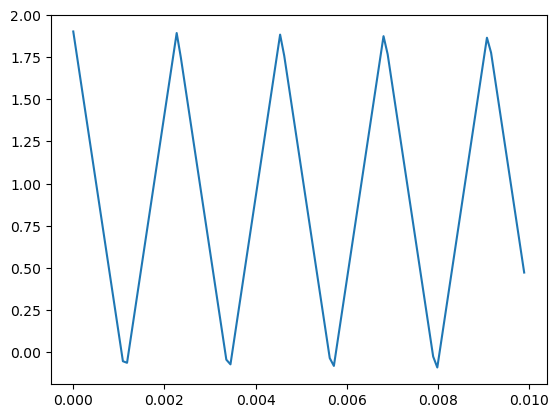

In [43]:
# Se modifica el hs[0] = 100 y se recrea la onda en el dominio del tiempo

spectrum_triangle440.hs[0] = 100
wave_triangle440_2 = spectrum_triangle440.make_wave()
wave_triangle440_2.plot()

El principial cambio percibido está en la amplitud de la señal triangular resultante. Ahora se acerca casi al doble. Con apoyo de ChatGPT, pude entender que la fs 0 Hz corresponde al componente DC de la señal. Una señal sin oscilación. Eso significa que al modificar hs[0], estoy modificando la amplitud de la componente continua del componente espectral de la señal.

# Exercise 2.5
Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the  corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0. \
Test your function using a square, triangle, or sawtooth wave.
1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect
does this operation have on the signal?

In [44]:
# Definición de la función

def mod_spectrum(spectrum):
    for i in range(len(spectrum.hs)):
        if spectrum.fs[i] == 0:
            spectrum.hs[i] = 0
        else:
            spectrum.hs[i] = spectrum.hs[i] / spectrum.fs[i]

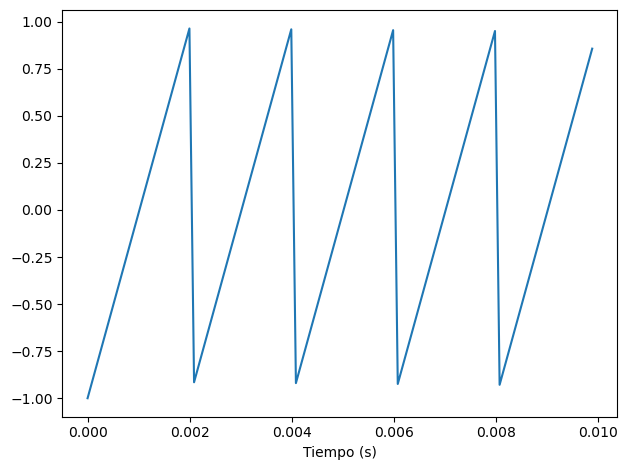

In [ ]:
# Se hacen las señales diente de sierra, triangular y cuadrada con frecuencia 500 Hz

# Diente de sierra

sawtooth500 = SawtoothSignal(freq = 500)
wave_sawtooth500 = sawtooth500.make_wave(framerate = framerate, duration = 0.01)
wave_sawtooth500.plot()
decorate(xlabel = 'Tiempo (s)')

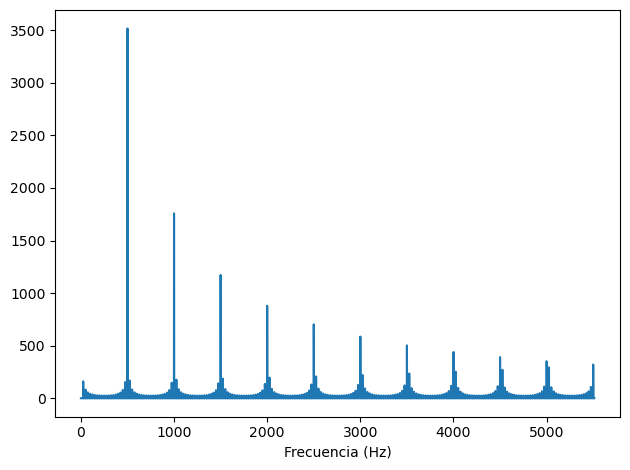

In [49]:
# Ahora su espectro

wave_sawtooth500 = sawtooth500.make_wave(framerate = framerate)
spectrum_sawtooth500 = wave_sawtooth500.make_spectrum()
spectrum_sawtooth500.plot()
decorate(xlabel = 'Frecuencia (Hz)')

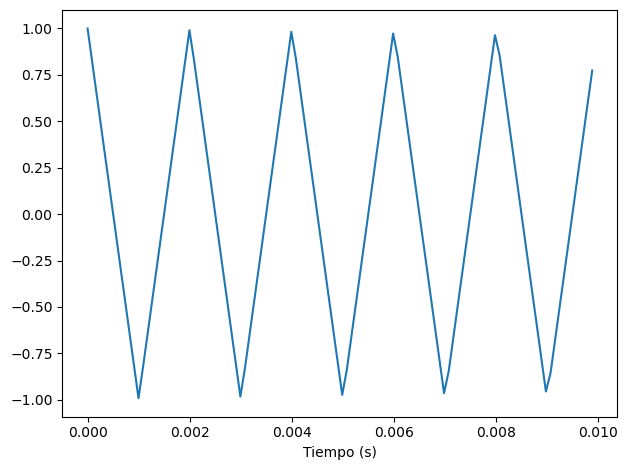

In [47]:
# Triangular

triangle500 = TriangleSignal(freq = 500)
wave_triangle500 = triangle500.make_wave(framerate = framerate, duration = 0.01)
wave_triangle500.plot()
decorate(xlabel = 'Tiempo (s)')

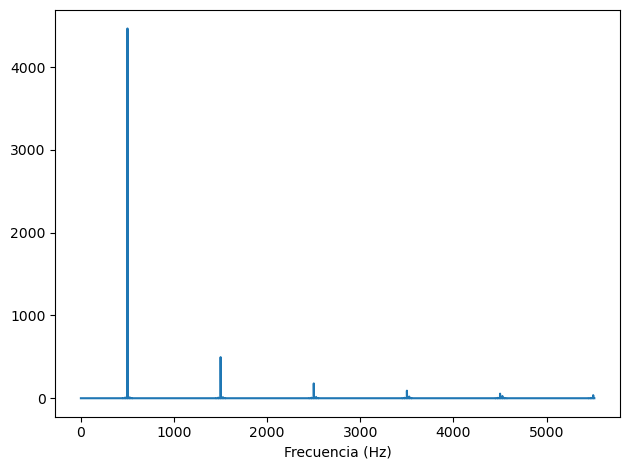

In [50]:
# Ahora su espectro

wave_triangle500 = triangle500.make_wave(framerate = framerate)
spectrum_triangle500 = wave_triangle500.make_spectrum()
spectrum_triangle500.plot()
decorate(xlabel = 'Frecuencia (Hz)')

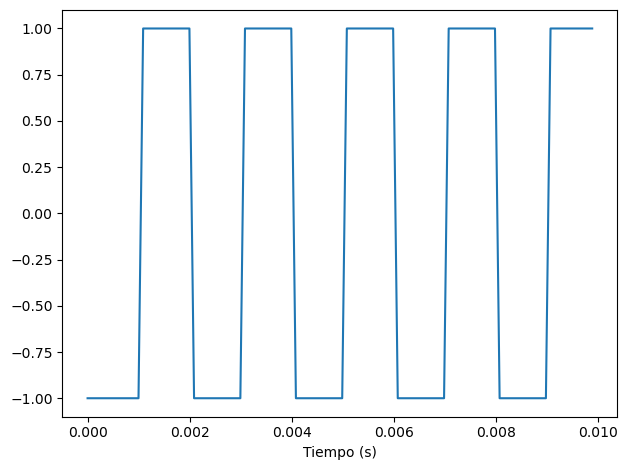

In [48]:
# Cuadrada

squared500 = SquareSignal(freq = 500)
wave_squared500 = squared500.make_wave(framerate = framerate, duration = 0.01)
wave_squared500.plot()
decorate(xlabel = 'Tiempo (s)')

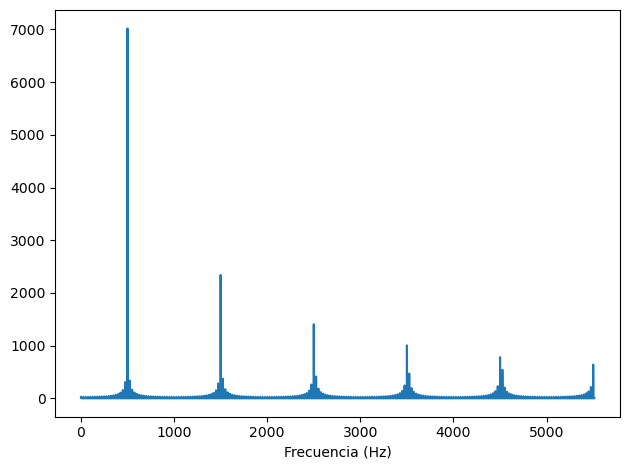

In [51]:
# Ahora su espectro

wave_squared500 = squared500.make_wave(framerate = framerate)
spectrum_squared500 = wave_squared500.make_spectrum()
spectrum_squared500.plot()
decorate(xlabel = 'Frecuencia (Hz)')

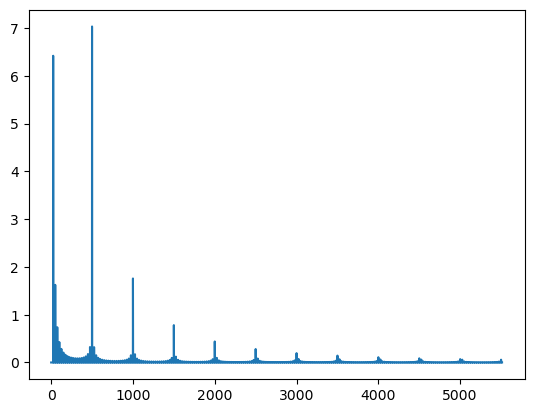

In [52]:
# Modificamos el espectro de la señal diente de sierra y la graficamos

mod_spectrum(spectrum_sawtooth500)
spectrum_sawtooth500.plot()

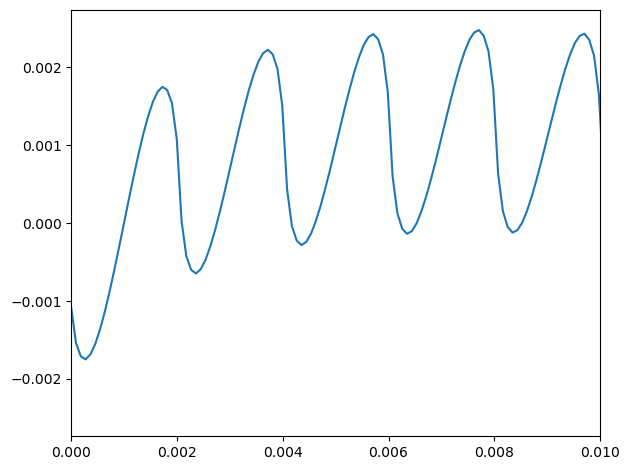

In [58]:
# Graficamos la señal en el tiempo de espectro modificado

spectrum_sawtooth500.make_wave().plot()
decorate(xlim = [0, 0.01])

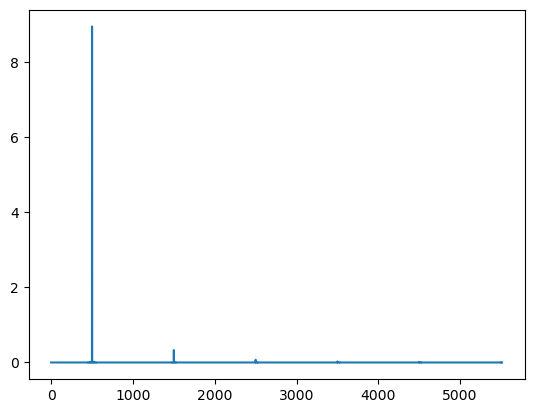

In [53]:
# Modificamos el espectro de la señal triangular y la graficamos

mod_spectrum(spectrum_triangle500)
spectrum_triangle500.plot()

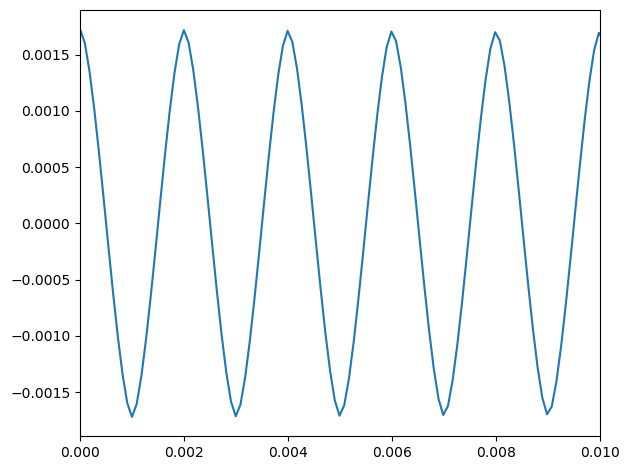

In [59]:
# Graficamos la señal en el tiempo de espectro modificado

spectrum_triangle500.make_wave().plot()
decorate(xlim = [0, 0.01])

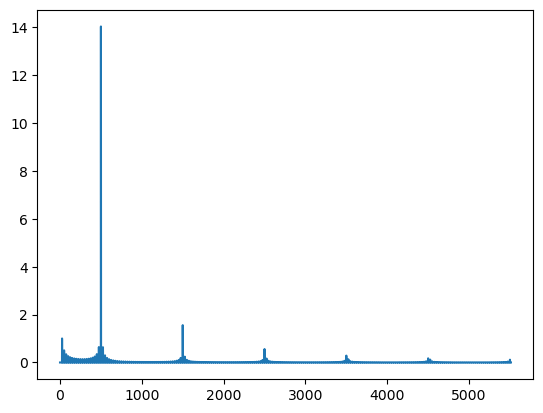

In [54]:
# Modificamos el espectro de la señal cuadrada y la graficamos

mod_spectrum(spectrum_squared500)
spectrum_squared500.plot()

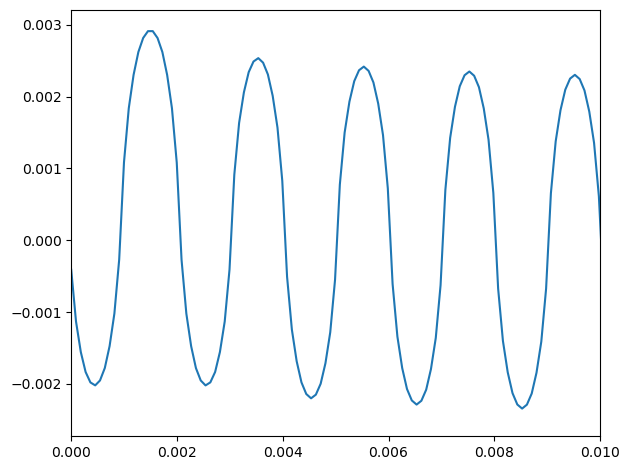

In [60]:
# Graficamos la señal en el tiempo de espectro modificado

spectrum_squared500.make_wave().plot()
decorate(xlim = [0, 0.01])

Cuando se divide la amplitud hs por la frecuencia fs, la amplitud de las altas frecuencias se reducen o atenuan más que las bajas frecuencias. Por eso las señales resultantes tienen una forma más suave y más cercana a una señal senoidal o triangular con menos ángulos. De acuerdo a ChatGPT, al dividir cada componente espectral por su frecuencia, se está aplicando una integración en el dominio de Fourier. Por eso el resultado se parece a una versión “acumulada” o “suavizada” de la señal original. Adicionalmente, el resultado elimina la componente continua de la señal original a llevarse hs[0] = 0 porque fs[0] = 0.

En resumen:
* Reduce los armónicos de alta frecuencia.
* Suaviza la forma de onda en el tiempo.
* Elimina la componente constante.

# Exercise 2.6
Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f^2. Can you find a waveform that has even and odd harmonics that drop off like 1/f^2? \
Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

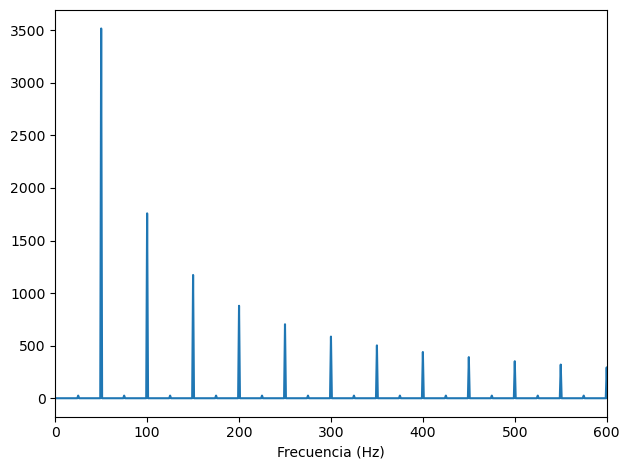

In [190]:
# Voy a tomar el segundo camino. La señal que más se parece es la diente de sierra.
# Simplemente tengo que reducir en una proporcion 1/f^2 la magnitud de la armónica

sawtooth50 = SawtoothSignal(freq = 50)
wave_sawtooth50 = sawtooth50.make_wave(framerate = framerate)
spectrum_sawtooth50 = wave_sawtooth50.make_spectrum()
spectrum_sawtooth50.plot(high = 10000)
decorate(xlabel = 'Frecuencia (Hz)', xlim = [0, 600])


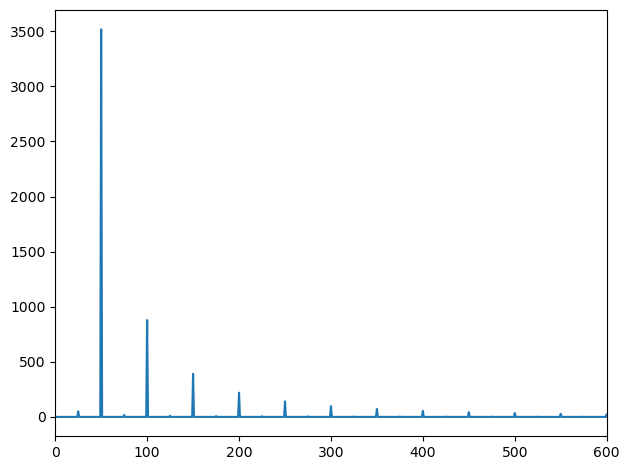

In [ ]:
# Voy a tomar el segundo camino. La señal que más se parece es la diente de sierra.
# Simplemente tengo que reducir en una proporcion 1/f^2 la magnitud de la armónica
# Gracias a ChatGPT

fs = spectrum_sawtooth50.fs
hs = spectrum_sawtooth50.hs.copy()
frec_fund = sawtooth50.freq

mask = fs != 0
n = np.abs(fs[mask] / frec_fund)
factor = 1 / n
hs[mask] *= factor

spectrum_sawtooth50.hs = hs
spectrum_sawtooth50.plot()
decorate(xlim=[0, 600])


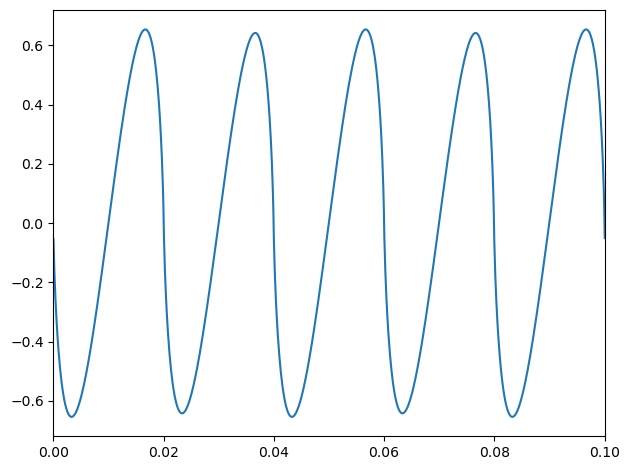

In [192]:
# Se convierte en wave

wave_sawtooth50_2 = spectrum_sawtooth50.make_wave()
wave_sawtooth50_2.plot()
decorate(xlim = [0, 0.1])

El resultado parece una señal seno un poco inclinada hacia a la derecha, con una amplitud superior a 0.6 y multiplicada por -1. Esta señal es más suave ya que las altas frecuencias se atenúan con rapidez.